# ISP560 Project

## Importing Libraries

In [2]:
# main libraries

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout

# support libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import skimage
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from skimage import data,color
from skimage.transform import resize, rescale, downscale_local_mean

import matplotlib.image as mpimg


# confusion matrix plotting

from sklearn.metrics import ConfusionMatrixDisplay, multilabel_confusion_matrix, confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## File Paths of Data

In [6]:
file = './Train'
print(os.listdir(file))

['Baked Potato', 'Burger', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog', 'Pizza', 'Sandwich', 'Taco', 'Taquito']


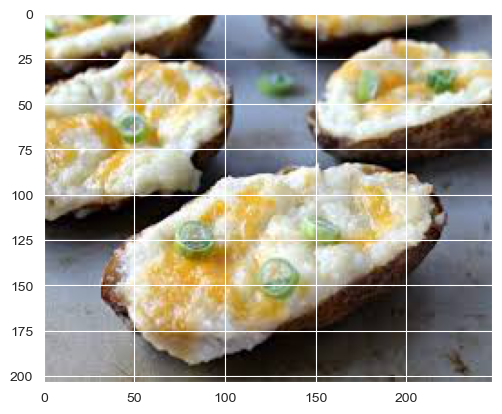

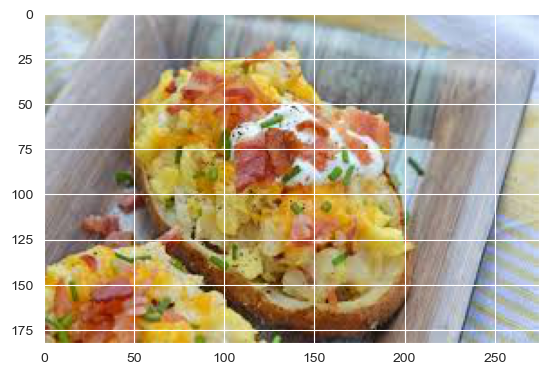

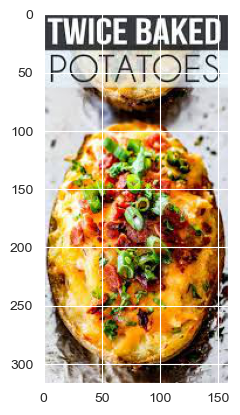

In [19]:
k=0
for fil in os.listdir('./Train/Baked Potato'):
    file = './Train/Baked Potato/' + fil
    img = mpimg.imread(file)
    plt.imshow(img)
    plt.show()
    k+=1
    if k==3:
        break

### Resizing Image to 100 x 100 pixels

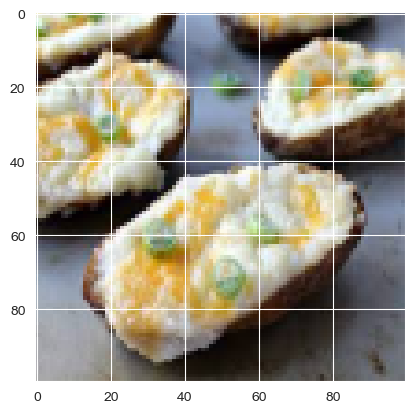

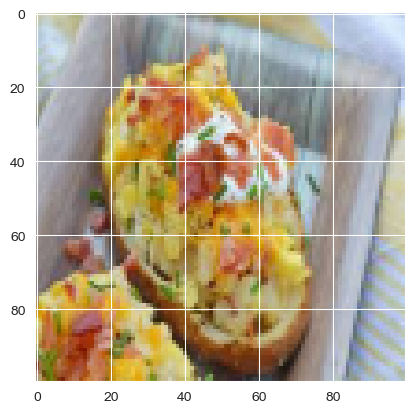

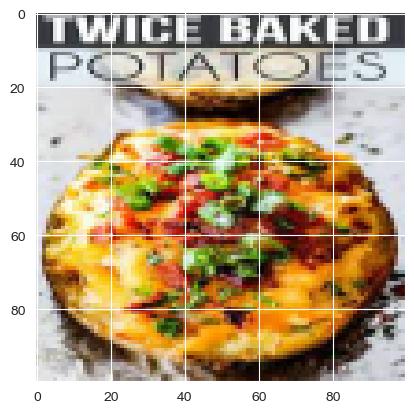

In [21]:
k=0
for fil in os.listdir('./Train/Baked Potato'):
    file = './Train/Baked Potato/' + fil
    img = mpimg.imread(file)
    img = resize(img, (100,100,3), anti_aliasing=True)
    plt.imshow(img)
    plt.show()
    k+=1
    if k==3:
        break

## Creating Dataframe

In [24]:
def create_dataframe(path, arr, label):
    for fil in os.listdir(path):
        file = path + fil
        if file[-3:]=='pyc' or file[-2:]=='py':
            continue
        img = mpimg. imread(file)
        img = resize(img, (100,100,3), anti_aliasing=True)
        img = img.reshape(30000)
        arr.append(img)
    xx = np.ones(len(arr))*label
    arr = pd.DataFrame(arr)
    xx = pd.DataFrame({'label':xx})
    arr = pd.concat([arr, xx], axis=1)
    return arr

In [25]:
baked_potatoes = []
baked_potatoes = create_dataframe('./Train/Baked Potato/', baked_potatoes, 0)

In [26]:
burger = []
burger = create_dataframe('./Train/Burger/', burger, 1)

In [27]:
crispy_chicken = []
crispy_chicken = create_dataframe('./Train/Crispy Chicken/', crispy_chicken, 2)

In [28]:
donut = []
donut = create_dataframe('./Train/Donut/', donut, 3)

In [29]:
fries = []
fries = create_dataframe('./Train/Fries/', fries, 4)

In [30]:
hot_dog = []
hot_dog = create_dataframe('./Train/Hot Dog/', hot_dog, 5)

In [31]:
pizza = []
pizza = create_dataframe('./Train/Pizza/', pizza, 6)

In [32]:
sandwich = []
sandwich = create_dataframe('./Train/Sandwich/', sandwich, 7)

In [33]:
taco = []
taco = create_dataframe('./Train/Taco/', taco, 8)

In [34]:
taquito = []
taquito = create_dataframe('./Train/Taquito/', taquito, 9)

In [35]:
baked_potatoes.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,0.953216,0.939339,0.756704,0.942758,0.928330,0.800812,0.916679,0.905858,0.850852,0.918815,...,0.439616,0.448153,0.467725,0.425313,0.433729,0.453339,0.422062,0.430478,0.450088,0.0
1,0.809906,0.797824,0.629764,0.782812,0.778054,0.666260,0.784740,0.787826,0.729643,0.816206,...,0.699547,0.766204,0.895363,0.698881,0.767275,0.820557,0.697195,0.758214,0.726459,0.0
2,0.225670,0.229592,0.249199,0.220749,0.224670,0.244278,0.226042,0.229963,0.249563,0.232334,...,0.799197,0.799197,0.830569,0.755785,0.755785,0.787157,0.816169,0.816169,0.847541,0.0
3,0.655518,0.433693,0.323166,0.610161,0.394384,0.292956,0.545071,0.339865,0.247166,0.569318,...,0.056031,0.106776,0.074688,0.014789,0.052915,0.021481,0.001834,0.029914,0.005225,0.0
4,0.901225,0.783578,0.578289,0.901251,0.784142,0.571632,0.906069,0.792159,0.570803,0.905385,...,0.826338,0.685162,0.442025,0.845470,0.704293,0.461156,0.849886,0.708710,0.465572,0.0


In [36]:
burger.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,0.137255,0.023529,0.000000,0.133333,0.019608,0.000000,0.129412,0.015686,0.000000,0.125490,...,0.125490,0.082353,0.066667,0.098039,0.054902,0.039216,0.094118,0.050980,0.035294,1.0
1,0.556863,0.458824,0.439216,0.501961,0.403922,0.376471,0.509804,0.403922,0.360784,0.545098,...,0.788235,0.807843,0.886275,0.784314,0.803922,0.882353,0.780392,0.800000,0.878431,1.0
2,0.754995,0.754995,0.786367,0.745243,0.745243,0.776615,0.736497,0.736497,0.767869,0.753124,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
3,1.000000,1.000000,1.000000,0.937255,0.937255,0.937255,0.913725,0.913725,0.913725,0.976471,...,0.945098,0.945098,0.945098,0.956863,0.956863,0.956863,0.964706,0.964706,0.964706,1.0
4,0.238605,0.285663,0.332722,0.227855,0.274914,0.321973,0.217570,0.264629,0.311687,0.206713,...,0.040691,0.075985,0.072063,0.043284,0.078578,0.074656,0.039400,0.074694,0.070772,1.0


In [37]:
crispy_chicken.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,0.958637,0.962558,0.982166,0.958637,0.962558,0.982166,0.959388,0.963309,0.982917,0.964520,...,0.982609,0.982609,0.974766,0.987029,0.987029,0.979186,0.984434,0.984434,0.976591,2.0
1,0.860688,0.868532,0.856767,0.863077,0.870920,0.859155,0.865684,0.873527,0.861763,0.867608,...,0.838487,0.846331,0.842409,0.833028,0.840871,0.836949,0.813417,0.821260,0.817339,2.0
2,0.062745,0.054902,0.003939,0.062745,0.054884,0.006681,0.062762,0.052207,0.013460,0.065454,...,0.058432,0.168762,0.295161,0.056990,0.160264,0.279540,0.054148,0.146754,0.267343,2.0
3,0.292750,0.237746,0.278381,0.284180,0.235673,0.274891,0.276129,0.234107,0.270827,0.268011,...,0.697282,0.485489,0.387843,0.695658,0.479065,0.376620,0.694985,0.475379,0.369918,2.0
4,0.783374,0.795139,0.673570,0.779333,0.791097,0.669529,0.776327,0.788092,0.666523,0.773003,...,0.846392,0.849974,0.851443,0.515008,0.492623,0.478879,0.550412,0.491066,0.464041,2.0


In [38]:
donut.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,0.724873,0.694642,0.661875,0.756107,0.7249,0.692642,0.773525,0.744193,0.714029,0.756716,...,0.966207,0.859199,0.849945,0.961450,0.844695,0.834572,0.962314,0.848247,0.842633,3.0
1,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0
2,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.945707,0.953942,0.998736,0.961055,0.967278,0.991038,0.996416,0.997438,0.995782,3.0
3,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0
4,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0


In [39]:
fries.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,0.890432,0.918831,0.946206,0.935900,0.952361,0.970664,0.927696,0.974874,0.966430,0.830123,...,0.022369,0.022369,0.022369,0.003716,0.003716,0.003716,0.003921,0.003921,0.003921,4.0
1,0.965817,0.965817,0.965817,0.968721,0.968721,0.968721,0.971309,0.971309,0.971309,0.973322,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,4.0
2,0.823749,0.262964,0.043356,0.827464,0.266680,0.047072,0.831167,0.270383,0.050775,0.831792,...,0.500023,0.076468,0.029565,0.501989,0.078411,0.031633,0.507094,0.078472,0.033159,4.0
3,0.939990,0.939990,0.947833,0.941604,0.941604,0.949447,0.945047,0.945047,0.952890,0.948692,...,0.919838,0.922387,0.906897,0.920551,0.923099,0.907618,0.919301,0.920958,0.912673,4.0
4,0.772613,0.677565,0.642125,0.807945,0.689224,0.636494,0.842289,0.703278,0.631309,0.851142,...,0.327782,0.200548,0.146091,0.341731,0.215753,0.162386,0.373885,0.244594,0.174970,4.0


In [40]:
hot_dog.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,0.617225,0.631227,0.648801,0.622684,0.644986,0.659822,0.641400,0.660155,0.678348,0.648494,...,0.732671,0.766933,0.816476,0.729145,0.763420,0.812955,0.723793,0.762804,0.809982,5.0
1,0.220020,0.324659,0.449927,0.234354,0.338441,0.464500,0.241050,0.337447,0.463806,0.240583,...,0.287256,0.129350,0.129677,0.145102,0.085017,0.093784,0.074273,0.076598,0.079499,5.0
2,0.989128,0.613019,0.310929,0.989616,0.625069,0.314491,0.988475,0.641132,0.315675,0.988531,...,0.994844,0.608216,0.308524,0.996395,0.598811,0.303972,0.988609,0.596211,0.302093,5.0
3,0.388941,0.269265,0.239728,0.517099,0.393837,0.351830,0.587538,0.465329,0.417348,0.579770,...,0.762247,0.563345,0.421517,0.749101,0.574273,0.460911,0.761283,0.573337,0.460143,5.0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.0


In [41]:
pizza.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,0.939807,0.955018,0.973001,0.940819,0.960575,0.941854,0.941218,0.964127,0.924506,0.944131,...,0.962353,0.686743,0.369666,0.904057,0.635432,0.211305,0.884044,0.588524,0.186063,6.0
1,0.992007,0.900234,0.739841,0.930994,0.933605,0.715077,0.921284,0.962880,0.710412,0.955380,...,0.991288,0.894967,0.595904,0.993624,0.830452,0.525154,0.969724,0.859900,0.588803,6.0
2,0.337699,0.239659,0.119509,0.346541,0.248502,0.126935,0.359794,0.262489,0.138718,0.384305,...,0.598511,0.500472,0.378903,0.654685,0.556646,0.435077,0.672304,0.574264,0.452696,6.0
3,0.881818,0.582875,0.636979,0.877073,0.582084,0.627903,0.882723,0.524460,0.575481,0.891105,...,0.824741,0.536304,0.275012,0.794936,0.477779,0.225083,0.779503,0.444017,0.198043,6.0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.0


In [42]:
sandwich.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,0.960784,0.949020,0.984314,0.960784,0.949020,0.984314,0.960778,0.949013,0.984308,0.955595,...,0.904318,0.896475,0.947455,0.911950,0.904107,0.955087,0.915066,0.907223,0.958203,7.0
1,0.472596,0.479439,0.460839,0.682556,0.659415,0.637798,0.768850,0.718335,0.694174,0.750185,...,0.384387,0.328816,0.271806,0.430707,0.343300,0.259426,0.577338,0.437841,0.310328,7.0
2,0.804506,0.824113,0.808427,0.808265,0.827872,0.812186,0.811614,0.831222,0.815536,0.809583,...,0.796319,0.754361,0.705510,0.880926,0.859741,0.824335,0.932589,0.930274,0.911451,7.0
3,0.674510,0.721569,0.713725,0.674510,0.721569,0.713725,0.674510,0.721569,0.713725,0.674510,...,0.737323,0.544746,0.315192,0.741244,0.554864,0.355026,0.665716,0.479561,0.311475,7.0
4,0.658575,0.456400,0.104049,0.672097,0.476016,0.103882,0.639036,0.453940,0.055255,0.680055,...,0.760586,0.776432,0.772033,0.760714,0.776534,0.772212,0.760784,0.776473,0.772543,7.0


In [43]:
taco.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,0.737538,0.590677,0.483220,0.727800,0.540552,0.423428,0.684969,0.457223,0.330263,0.619592,...,0.292055,0.264606,0.295978,0.295637,0.268186,0.299558,0.297617,0.270166,0.301538,8.0
1,0.145769,0.145769,0.137926,0.208469,0.208469,0.200626,0.226057,0.226057,0.218214,0.182079,...,0.196078,0.160784,0.235294,0.195108,0.159814,0.234324,0.188476,0.153182,0.227692,8.0
2,0.393338,0.170102,0.117187,0.396836,0.173600,0.120685,0.398019,0.174783,0.121868,0.387494,...,0.459907,0.367538,0.409388,0.446030,0.350544,0.399322,0.426672,0.321151,0.356927,8.0
3,0.123821,0.127743,0.104213,0.103829,0.107750,0.084221,0.111368,0.115289,0.091760,0.112021,...,0.027877,0.027877,0.027877,0.026160,0.026691,0.026425,0.024141,0.028305,0.026223,8.0
4,0.618768,0.637971,0.523763,0.593992,0.660668,0.521750,0.677474,0.683869,0.562039,0.655698,...,0.201947,0.175160,0.016319,0.266536,0.234853,0.072709,0.344498,0.293123,0.049184,8.0


In [44]:
taquito.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
0,0.258359,0.050515,0.027590,0.228448,0.018715,0.001278,0.243900,0.027151,0.008281,0.247345,...,0.784424,0.180936,0.103518,0.786064,0.197256,0.070306,0.791204,0.205349,0.084047,9.0
1,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,...,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,9.0
2,0.851860,0.851860,0.898919,0.854368,0.854368,0.901427,0.858095,0.858095,0.905154,0.860594,...,0.720216,0.716294,0.747667,0.721568,0.717647,0.749019,0.721569,0.717647,0.749020,9.0
3,0.881939,0.881939,0.928998,0.885469,0.885469,0.932528,0.878561,0.878561,0.925620,0.830041,...,0.788513,0.790714,0.809591,0.777652,0.780991,0.791575,0.779446,0.783215,0.792820,9.0
4,0.312764,0.416572,0.351167,0.338760,0.442566,0.385725,0.350352,0.464034,0.389073,0.266536,...,0.763525,0.834489,0.928245,0.764725,0.835402,0.929250,0.768906,0.839258,0.933252,9.0


### Verify number of images

In [45]:
len(baked_potatoes),len(burger),len(crispy_chicken),len(donut),len(fries),len(hot_dog),len(pizza),len(sandwich),len(taco),len(taquito)

(1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500)

In [46]:
tr1 = baked_potatoes.drop('label',1)
ts1 = baked_potatoes['label']

x_train, x_test, y_train, y_test = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

tr1 = burger.drop('label',1)
ts1 = burger['label']

x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)

y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = crispy_chicken.drop('label',1)
ts1 = crispy_chicken['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = donut.drop('label',1)
ts1 = donut['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = fries.drop('label',1)
ts1 = fries['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = hot_dog.drop('label',1)
ts1 = hot_dog['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = pizza.drop('label',1)
ts1 = pizza['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = sandwich.drop('label',1)
ts1 = sandwich['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = taco.drop('label',1)
ts1 = taco['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = taquito.drop('label',1)
ts1 = taquito['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

C:\Users\prspc\AppData\Local\Temp\ipykernel_23376\3974306883.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tr1 = baked_potatoes.drop('label',1)
C:\Users\prspc\AppData\Local\Temp\ipykernel_23376\3974306883.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tr1 = burger.drop('label',1)
C:\Users\prspc\AppData\Local\Temp\ipykernel_23376\3974306883.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tr1 = crispy_chicken.drop('label',1)
C:\Users\prspc\AppData\Local\Temp\ipykernel_23376\3974306883.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tr1 = donut.drop('label',1)
C:\Users\prspc\AppData\Local\Temp\ipykernel_23376\3974306883.py

In [47]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 620 to 684
Columns: 30000 entries, 0 to 29999
dtypes: float64(30000)
memory usage: 2.7 GB


In [48]:
fast_food = ['baked_potatoes', 'burger', 'crispy_chicken', 'donut', 'fries', 'hot_dog', 'pizza', 'sandwich', 'taco', 'taquito']

## Preprocessing the dataset

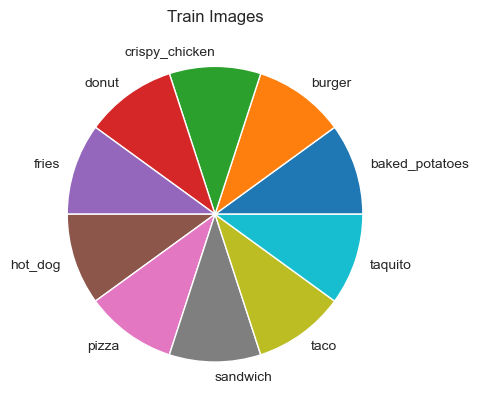

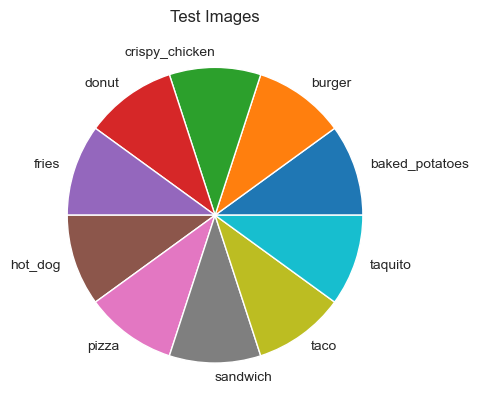

In [49]:
plt.title('Train Images')
plt.pie(y_train['label'].value_counts().values, labels=fast_food)
plt.show()

plt.title('Test Images')
plt.pie(y_test['label'].value_counts().values, labels=fast_food)
plt.show()


In [50]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

In [51]:
train = train.sample(frac=1)
test = test.sample(frac=1)

In [52]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,label
176,0.475677,0.440376,0.405082,0.554052,0.516533,0.481244,0.605690,0.561066,0.527594,0.626059,...,0.539232,0.570605,0.621585,0.518764,0.549651,0.602087,0.510195,0.537766,0.600150,5.0
541,0.927233,0.913009,0.909087,0.932547,0.919716,0.915794,0.941126,0.929373,0.925451,0.933336,...,0.794883,0.794883,0.787040,0.790920,0.790915,0.783063,0.856398,0.852280,0.837886,6.0
316,0.840432,0.795478,0.769732,0.840976,0.774650,0.749036,0.813185,0.739844,0.696043,0.671408,...,0.813540,0.784728,0.764138,0.750945,0.760772,0.762841,0.340660,0.450664,0.567363,5.0
1190,0.956863,0.952941,0.945098,0.956863,0.952941,0.945098,0.956376,0.952454,0.944611,0.951496,...,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.0
1409,0.822620,0.616547,0.605591,0.890028,0.621892,0.670103,0.908444,0.584749,0.672653,0.936399,...,0.993752,0.993752,0.993752,0.994694,0.994694,0.994694,0.989030,0.989030,0.989030,1.0


In [53]:
x_train = train.drop('label',1)
y_train = train['label']
x_test = test.drop('label',1)
y_test = test['label']

C:\Users\prspc\AppData\Local\Temp\ipykernel_23376\1951910877.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train = train.drop('label',1)
C:\Users\prspc\AppData\Local\Temp\ipykernel_23376\1951910877.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test = test.drop('label',1)


In [54]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [55]:
type(y_train[0]),type(y_test[0])

(numpy.float64, numpy.float64)

In [56]:
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

In [57]:
decoder = fast_food

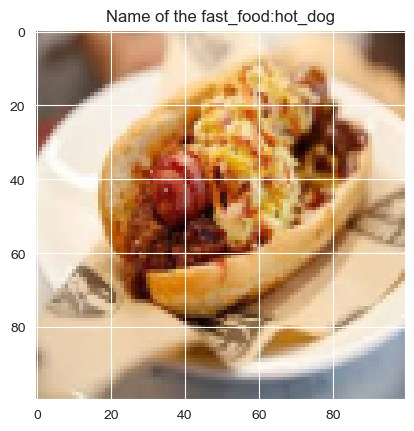

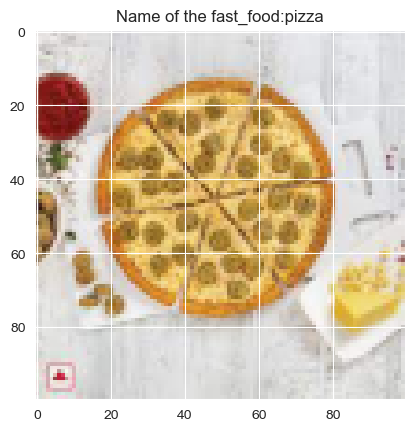

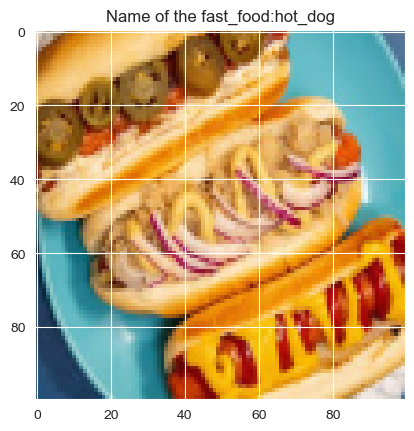

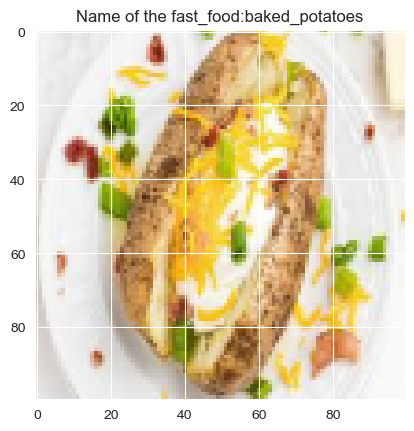

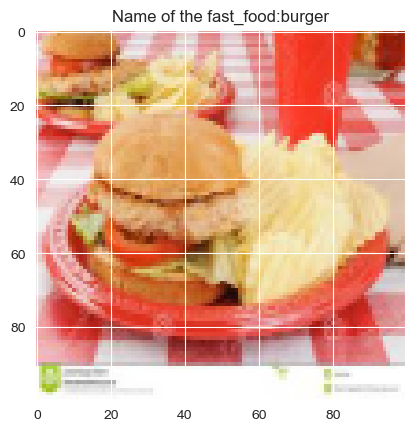

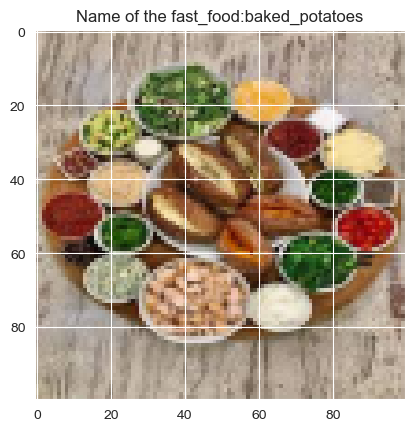

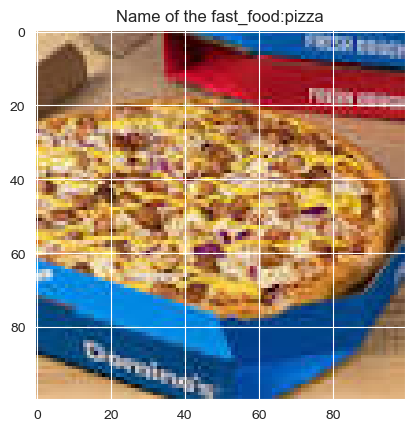

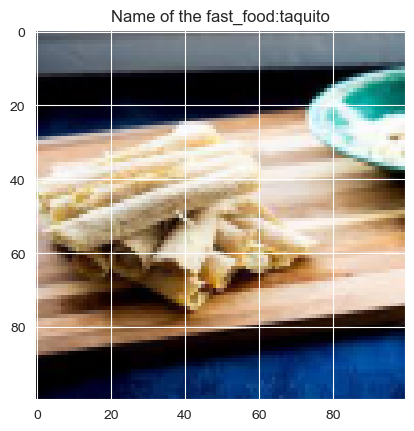

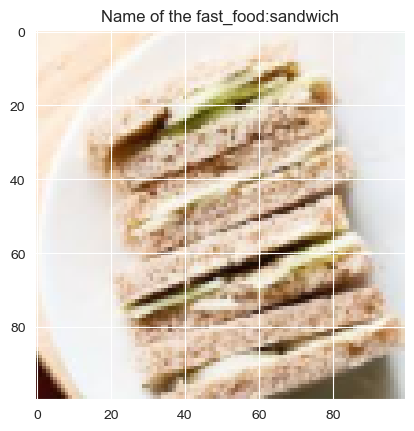

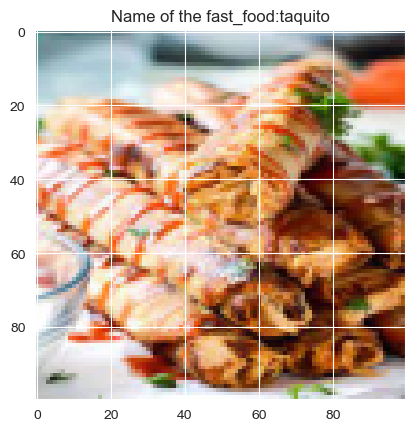

In [59]:
for i in range(10):
    plt.title('Name of the fast_food:'+decoder[y_train[i]])
    plt.imshow(x_train[i].reshape(100,100,3))
    plt.show()

In [60]:
x_train.shape,x_test.shape

((12000, 30000), (3000, 30000))

In [61]:
x_train = x_train.reshape(12000,100,100,3)
x_test = x_test.reshape(3000,100,100,3)
y_train = y_train.reshape(12000,1)
y_test = y_test.reshape(3000,1)

In [62]:
model = Sequential()

model.add(Conv2D(64, activation='relu', kernel_size=(3,3), input_shape=x_train[0].shape))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 dense (Dense)               (None, 98, 98, 64)        4160      
                                                                 
 dropout (Dropout)           (None, 98, 98, 64)        0         
                                                                 
 dense_1 (Dense)             (None, 98, 98, 64)        4160      
                                                                 
 dropout_1 (Dropout)         (None, 98, 98, 64)        0         
                                                                 
 flatten (Flatten)           (None, 614656)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               7

## Compiling the Model

In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the Model

In [67]:
hist = model.fit(x_train, y_train, batch_size=5, epochs=10, verbose=1, validation_data=(x_test, y_test))

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

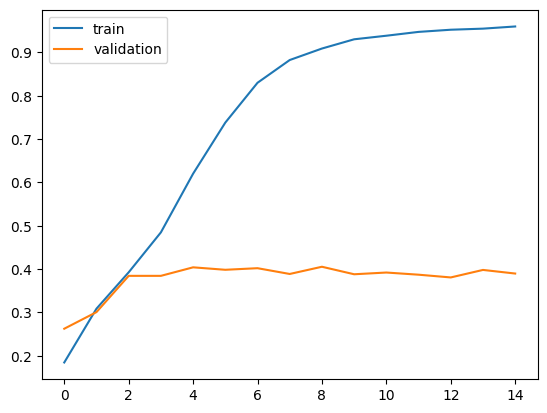

In [130]:
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

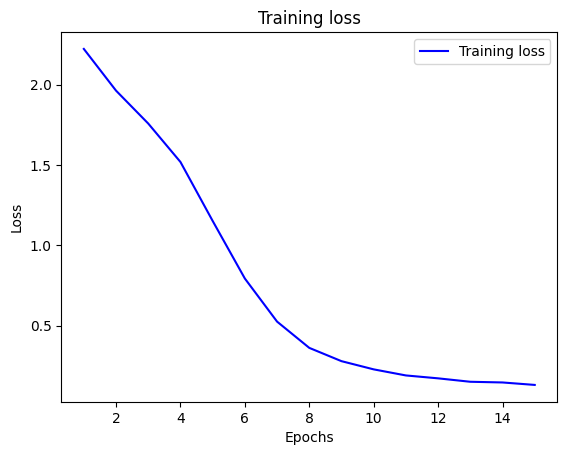

In [131]:
loss = hist.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()    
plt.show()

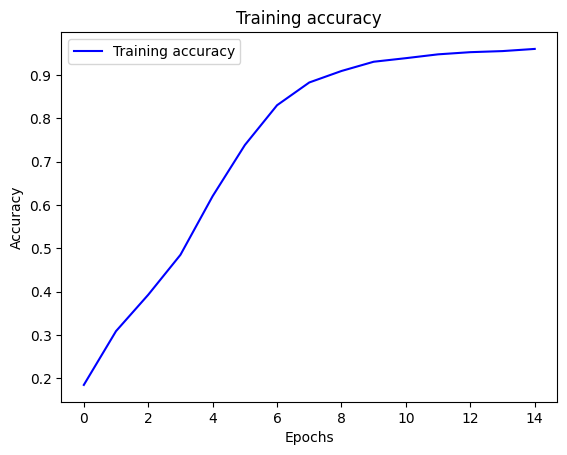

In [132]:
accuracy_values = hist.history['accuracy']
plt.plot(accuracy_values, '-b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Test Accuracy

In [133]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('\nTest accuracy:', test_acc)

94/94 [==============================] - 2s 25ms/step - loss: 4.4710 - accuracy: 0.3897

Test accuracy: 0.38966667652130127


## Confusion Matrix

In [134]:
y_pred = model.predict(x_test)
print(y_pred)

94/94 [==============================] - 2s 25ms/step
[[1.43899598e-07 8.67135554e-07 6.46257888e-07 ... 2.31217300e-07
  2.07142912e-05 9.97740746e-01]
 [6.40987636e-08 4.85301825e-06 1.88426030e-09 ... 1.40772545e-05
  1.67294183e-05 1.41224268e-06]
 [9.42094448e-06 9.80497718e-01 2.10701128e-05 ... 1.80099979e-02
  1.78354501e-04 1.23586215e-03]
 ...
 [1.71599714e-12 4.51982451e-09 1.38620919e-04 ... 9.36420634e-02
  1.59085217e-10 6.86911372e-09]
 [1.34130050e-05 1.23118707e-05 8.11352220e-05 ... 6.97289826e-04
  3.49045604e-06 5.65284282e-08]
 [3.32319949e-08 6.01314364e-15 2.45173282e-09 ... 1.18083690e-05
  2.25636865e-09 4.02811651e-09]]


In [136]:
y_pred[:5]

array([[1.43899598e-07, 8.67135554e-07, 6.46257888e-07, 2.23571248e-03,
        5.57981650e-07, 5.09688784e-11, 3.90047688e-07, 2.31217300e-07,
        2.07142912e-05, 9.97740746e-01],
       [6.40987636e-08, 4.85301825e-06, 1.88426030e-09, 1.15707968e-08,
        2.56518871e-01, 7.43442178e-01, 1.79575557e-06, 1.40772545e-05,
        1.67294183e-05, 1.41224268e-06],
       [9.42094448e-06, 9.80497718e-01, 2.10701128e-05, 3.94070554e-10,
        9.50917354e-07, 4.66664897e-05, 4.14888746e-08, 1.80099979e-02,
        1.78354501e-04, 1.23586215e-03],
       [2.10573390e-01, 2.92160394e-07, 1.27972249e-04, 1.53923145e-06,
        7.88435340e-01, 1.26721425e-05, 7.97933751e-07, 7.58648850e-04,
        8.87452115e-05, 6.05047717e-07],
       [1.97486792e-04, 9.56897438e-01, 3.01905038e-05, 1.07181977e-05,
        6.66148753e-06, 5.55592960e-05, 8.07942433e-06, 1.87779684e-02,
        2.37706508e-02, 2.45319650e-04]], dtype=float32)

In [137]:
y_test[:5]

array([[9],
       [4],
       [7],
       [0],
       [7]], dtype=int64)

In [138]:
print(np.argmax(y_pred[50]))

5


In [139]:
print(fast_food[np.argmax(y_pred[50])])

hot_dog
